In [1]:
# extend the width of the notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
display(HTML("<style>.output_result { width:95% !important; }</style>"))

# autoreload allows changes to modules on the fly (no need for reloading them after a change in the code)
%load_ext autoreload
%autoreload 2

In [175]:
from plot_smeft import *
from smeft_train import *
import pickle

## data

In [176]:
scalar_branches, vector_branches = get_branch_names()

In [177]:
scalar_events, vector_events, weights = load_data(file_names='/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_1*.root')

In [178]:
len(scalar_branches)

44

In [160]:
scalar_events.shape

(76269, 75)

In [161]:
weights.shape

(76269, 3)

In [179]:
w0 = weights[:,0,np.newaxis]

In [180]:
w1_0 = weights[:,1,np.newaxis]/w0

In [164]:
w0

array([[5.4200552e-07],
       [5.7911984e-07],
       [5.9062677e-07],
       ...,
       [5.7520469e-07],
       [5.4408537e-07],
       [6.5325003e-07]], dtype=float32)

In [165]:
w1_0

array([[-0.07689352],
       [-0.14169839],
       [-0.17149583],
       ...,
       [-0.13440216],
       [-0.08157922],
       [-0.24828416]], dtype=float32)

In [181]:
dataset = JointDataset(x=scalar_events, y=(w0,w1_0))

In [182]:
data_loader = DataLoader(dataset, batch_size=1000)

## training

In [183]:
model = MLP(input_nfeatures=44, num_classes=1, hidden_layers=(300,100,100))
model

MLP(
  (mlp): Sequential(
    (0): BatchNorm1d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=44, out_features=300, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_features=300, out_features=100, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Linear(in_features=100, out_features=100, bias=True)
    (8): ReLU()
    (9): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [152]:
file_name = 'model_21_10_22_1.pkl'

In [153]:
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

In [150]:
with open(file_name, 'rb') as f:
    model1 = pickle.load(f)

################ epoch: 0, loss: 4.097739600084083e-06


################ epoch: 10, loss: 4.0649424288830005e-06


################ epoch: 20, loss: 4.029858114762419e-06


################ epoch: 30, loss: 3.996562165653472e-06


################ epoch: 40, loss: 3.967525797676785e-06


################ epoch: 50, loss: 3.938973417660918e-06


################ epoch: 60, loss: 3.912679781947759e-06


################ epoch: 70, loss: 3.8883598403316455e-06


################ epoch: 80, loss: 3.8647672742087025e-06


################ epoch: 90, loss: 3.8427120543360616e-06


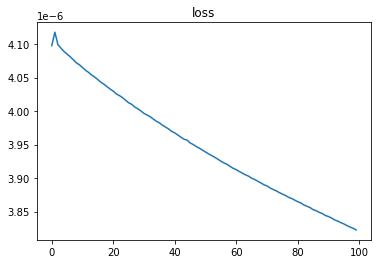

In [186]:
learn_lin_weight(model=model,
                 data_loader=data_loader,
                 n_epoch=100,
                 learning_rate=1e-5,
                 print_every=10)

## Evaluation

In [67]:

for i, (x,y,z) in enumerate(data_loader):
    if i>0:break
    for i in range(100):
        print((model(x))[i], z[i])
    #print(model(x))
    #print((y[:,1]/y[:,0]))
    #print(y)

tensor([-0.1054], grad_fn=<SelectBackward0>) tensor([-0.0769])
tensor([-0.2093], grad_fn=<SelectBackward0>) tensor([-0.1417])
tensor([-0.1624], grad_fn=<SelectBackward0>) tensor([-0.1715])
tensor([-0.1248], grad_fn=<SelectBackward0>) tensor([-0.1294])
tensor([-0.0749], grad_fn=<SelectBackward0>) tensor([-0.0494])
tensor([-0.1053], grad_fn=<SelectBackward0>) tensor([-0.1061])
tensor([-0.0707], grad_fn=<SelectBackward0>) tensor([-0.0617])
tensor([-0.0639], grad_fn=<SelectBackward0>) tensor([-0.0722])
tensor([-0.0572], grad_fn=<SelectBackward0>) tensor([-0.0611])
tensor([-0.2340], grad_fn=<SelectBackward0>) tensor([-0.2292])
tensor([0.0017], grad_fn=<SelectBackward0>) tensor([-0.0449])
tensor([-0.0880], grad_fn=<SelectBackward0>) tensor([-0.0542])
tensor([-0.1319], grad_fn=<SelectBackward0>) tensor([-0.1514])
tensor([-0.2952], grad_fn=<SelectBackward0>) tensor([-0.2856])
tensor([-0.0762], grad_fn=<SelectBackward0>) tensor([-0.0739])
tensor([-0.2056], grad_fn=<SelectBackward0>) tensor([-0.

In [187]:
test_scalar_events, test_vector_events, test_weights = load_data(file_names='/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_2*.root')
test_w0 = test_weights[:,0,np.newaxis]
test_w1_0 = test_weights[:,1,np.newaxis]/test_w0

In [188]:
pred=model(torch.tensor(scalar_events)).detach().numpy()
test_pred=model(torch.tensor(test_scalar_events)).detach().numpy()

### distribution of the true and learned relative linear weight

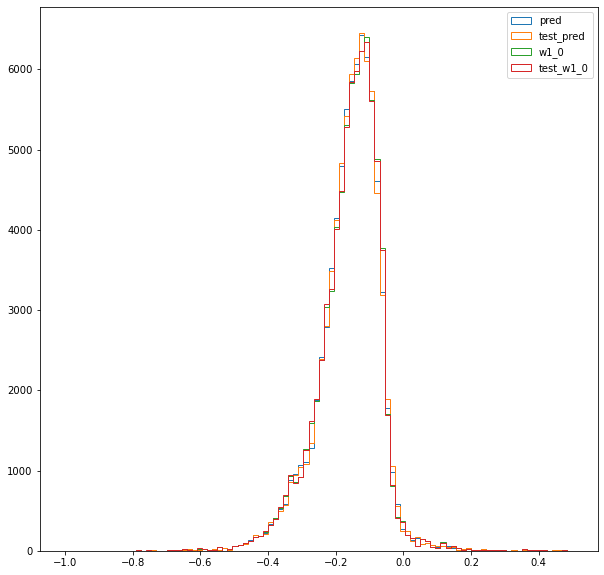

In [190]:
bins=np.histogram(np.hstack((pred,w1_0)),range=(-1.0,0.5),  bins=100)[1]
plt.figure(figsize=[10,10])
plt.hist(pred, histtype='step', bins=bins, range=(-1.0,0.5), label='pred', log=False)
plt.hist(test_pred, histtype='step', bins=bins, range=(-1.0,0.5), label='test_pred', log=False)
plt.hist(w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='w1_0', log=False)
plt.hist(test_w1_0, histtype='step', bins=bins, range=(-1.0,0.5), label='test_w1_0', log=False)
plt.legend()
plt.show()

### distribution of absolute errors

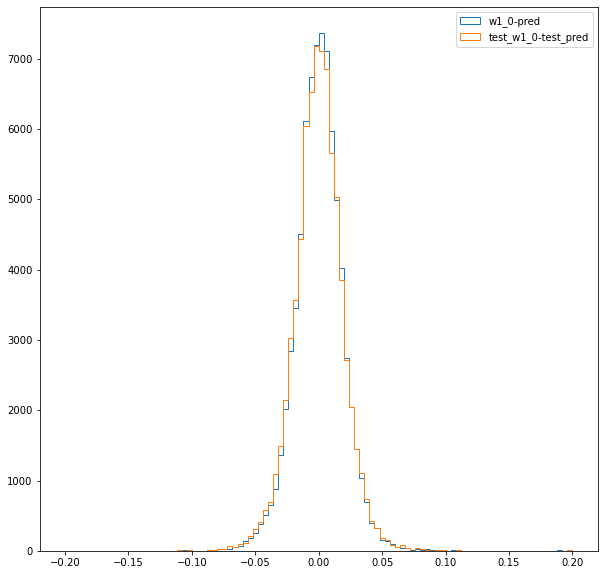

In [191]:
plt.figure(figsize=[10,10])
plt.hist((w1_0-pred), bins=100, histtype='step', label='w1_0-pred', range=(-0.2,0.2), log=False)
plt.hist((test_w1_0-test_pred), bins=100, histtype='step',label='test_w1_0-test_pred', range=(-0.2,0.2), log=False)
plt.legend()
plt.show()

### 2d hist truth vs prediction

In [192]:
from matplotlib import colors

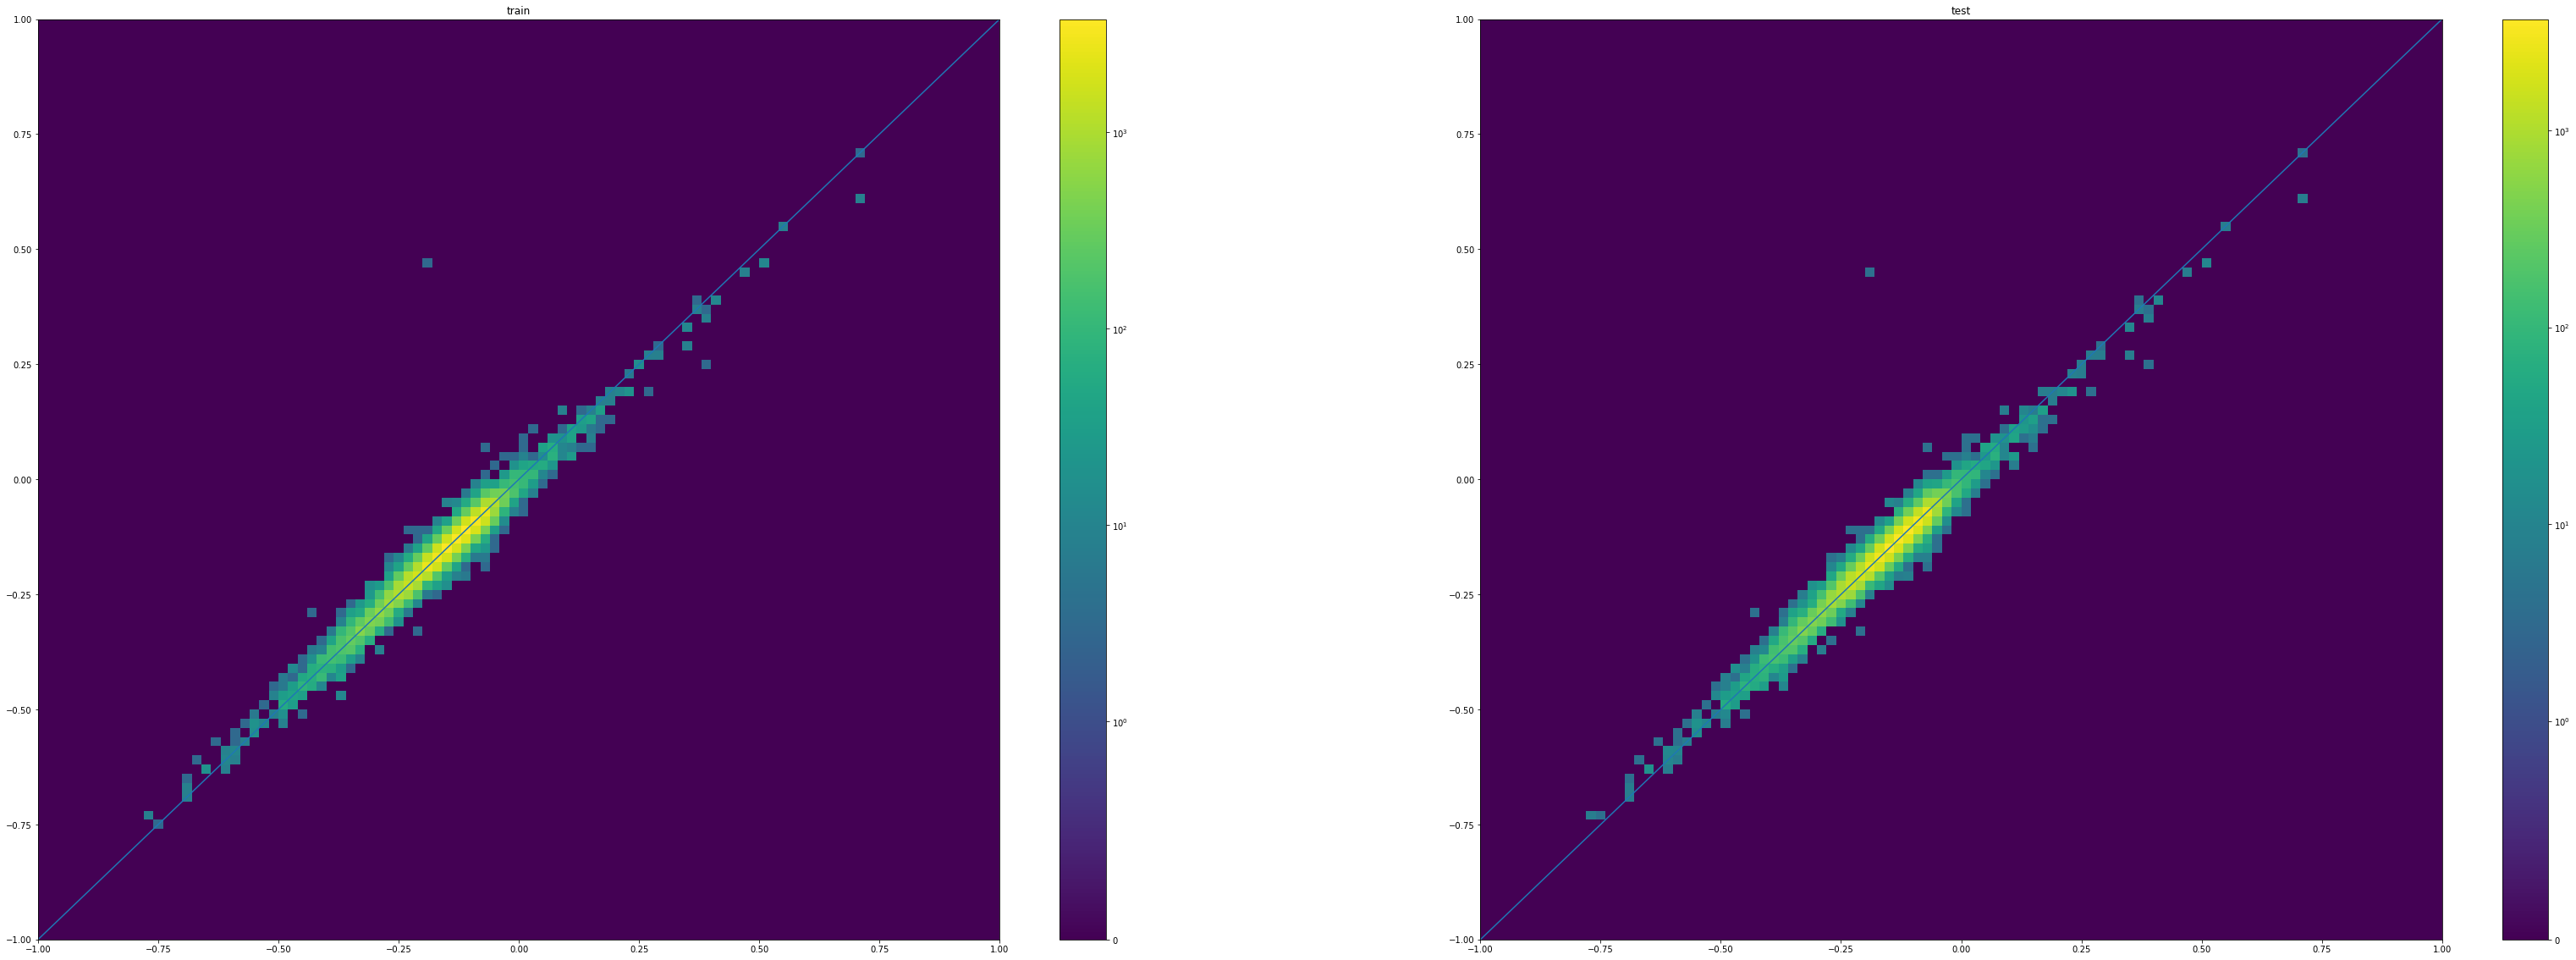

In [203]:
plt.subplots(figsize=[56,20])
plt.subplot(1,2,1)
plt.hist2d(w1_0.flatten(), pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('train')
plt.subplot(1,2,2)
plt.hist2d(test_w1_0.flatten(), test_pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
plt.plot([-1,1],[-1,1])
plt.colorbar()
plt.title('test')
plt.show()

## Histograms

saved file to /groups/hephy/cms/oskar.rothbacher/www/pytorch/genTops/genTops/hists.png


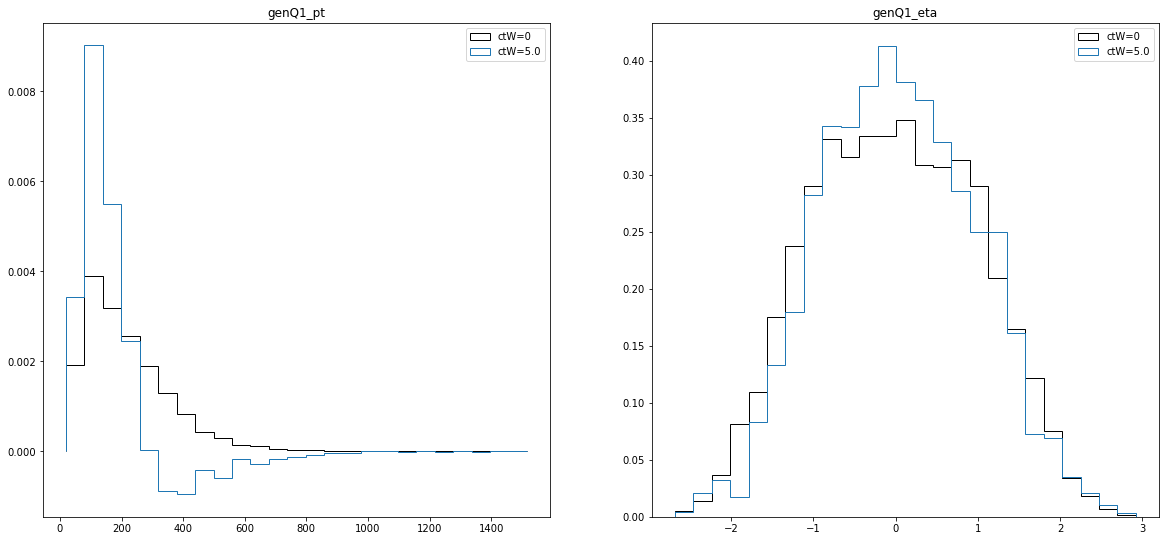

In [98]:
plot_eft_hists(data=scalar_events[:,:2],
               branch_list=scalar_branches[:2],
               weights=weights,
               bins=25,
               theta=(5.0,))

In [24]:
quantiles_005 = np.linspace(0,1,21)

In [25]:
quantiles_005

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [74]:
bins=np.quantile(scalar_events[:,0],quantiles_005)

(array([3809., 3811., 3820., 3807., 3814., 3818., 3815., 3813., 3809.,
        3814., 3816., 3815., 3810., 3816., 3812., 3815., 3808., 3814.,
        3819., 3814.]),
 array([-2.68316174, -1.59433842, -1.30670404, -1.10137415, -0.92858386,
        -0.76884013, -0.61271542, -0.46252388, -0.30635458, -0.1663415 ,
        -0.01870443,  0.12980531,  0.27301096,  0.44002056,  0.60248595,
         0.76152301,  0.92035466,  1.09389782,  1.31680667,  1.63048751,
         2.92064834]),
 [<matplotlib.patches.Polygon at 0x7f2ba2c01750>])

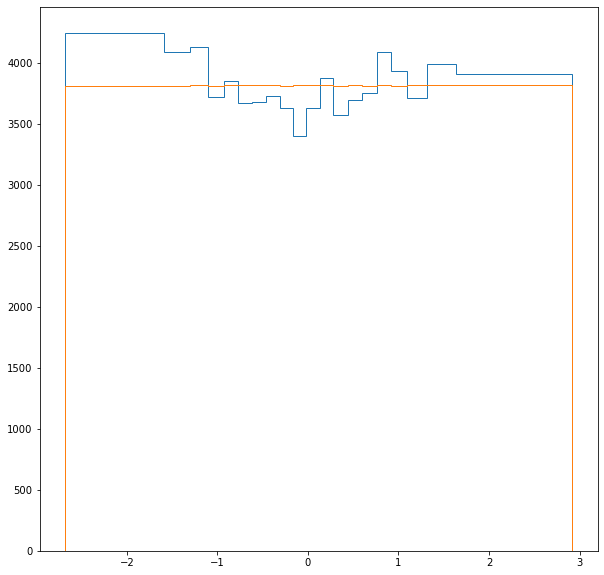

In [96]:
i=1
bins=np.quantile(scalar_events[:,i],quantiles_005)
plt.figure(figsize=[10,10])
plt.hist(scalar_events[:,i], weights=1+(weights[:,0]-weights[:,0].mean())/weights[:,0].std(), bins=bins, histtype='step', density=False)
plt.hist(scalar_events[:,i], bins=bins, histtype='step', density=False)

## LLR plots

In [130]:
def llr_poisson(n,lmbd_0, lmbd):
    return n * np.log(lmbd/lmbd_0) - lmbd -lmbd_0

In [131]:
n = 10; lmbd_0 = 10
x_plot = np.linspace(lmbd_0-3*np.sqrt(lmbd_0), lmbd_0+3*np.sqrt(lmbd_0), 1000)

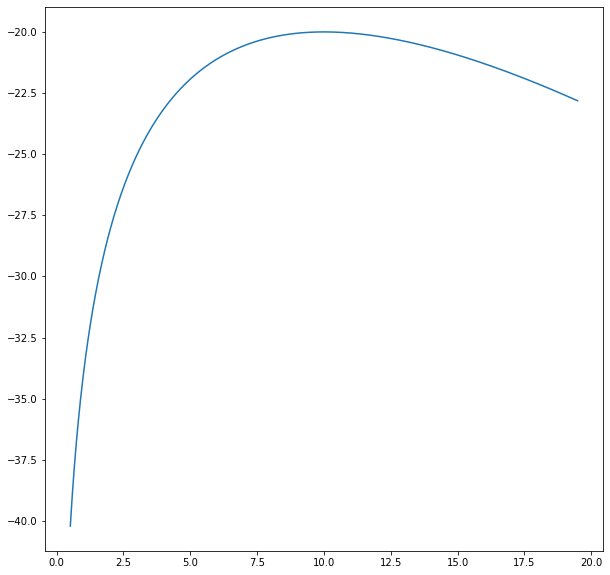

In [138]:
plt.figure(figsize=[10,10])
plt.plot(x_plot, llr_poisson(n, lmbd_0, x_plot))